In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

MACHINE LEARNING

I - SUPERVISED LEARNING

In [4]:
# Import the data
file_path = Path("/Copy_of_myopia.csv")
df = pd.read_csv(file_path)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [7]:
#Split data into X and y
X = df.drop("MYOPIC", axis=1)
y = df["MYOPIC"]

In [8]:
X.head()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: MYOPIC, dtype: int64

Split the Data

In [10]:
# Split the data into X_train, X_test, y_train, y_test
# X, y = make_classification(random_state=1)
# X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building Models

1 - Random Forest

In [11]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8774193548387097


2 - Logistic Regression

In [12]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')

Training Data Score: 0.896328293736501
Testing Score: 0.9161290322580645


II - UNSUPERVISED LEARNING

In [32]:
# Import the data
file_path = Path("/Copy_of_myopia.csv")
df = pd.read_csv(file_path)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [33]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [34]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [35]:
# Remove the Myopic Column
df = df.drop(columns=["MYOPIC"])
df.head()

,ID,STUDYYEAR,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [36]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column ID has 0 null values
Column STUDYYEAR has 0 null values
Column AGE has 0 null values
Column GENDER has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [37]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


Applying Dimensional Reduction

1 - Using PCA

In [38]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
print(myopia_scaled[0:2])

[[-1.7292504  -0.2072718  -0.42021911  1.02291623 -1.36391691 -0.89286055
   0.4837838  -0.28144248 -1.01979129  4.1506609   1.69744958 -0.68931054
  -0.67299591  0.18405806  0.49830393  0.98713773  1.0032415 ]
 [-1.72364505  1.52372783 -0.42021911  1.02291623 -0.3086122  -0.17183857
   0.53591074 -0.96799697 -0.13076248 -0.99889822 -0.91206246 -0.36187479
  -0.22140908 -0.34093217 -0.87508755  0.98713773  1.0032415 ]]


In [39]:
# Applying PCA to reduce dimensions from 17 to 2

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the myopia data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [19]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10", "principal component 11", "principal component 12"]
)
df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12
0,0.408499,1.191465,-0.246194,-1.038392,1.574974,-3.107343,-1.225087,1.315711,-2.842333,1.347579,0.827039,1.182845
1,-1.255955,-1.759295,0.089352,-1.736459,0.864528,0.309315,0.271741,-1.138678,-0.359133,1.292298,0.655064,-0.230062
2,-0.835538,-0.545967,-1.183861,1.475540,1.405637,0.083998,0.560589,-0.676384,-0.533608,0.592163,-0.052580,0.909940
3,0.248691,1.376902,-1.102852,-1.637322,1.786885,-0.490410,-1.533904,0.719286,-2.116014,0.270067,-0.600760,0.213377
4,-0.663497,-3.404216,0.595747,0.245819,0.862921,0.357488,0.974725,0.930010,-1.459994,-0.074953,1.066740,0.053505


In [40]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19030896, 0.13581604, 0.07838877, 0.07177955, 0.06717321,
       0.06492168, 0.05988553, 0.05686956, 0.05012642, 0.0488099 ,
       0.04320317, 0.03808922])

2 - Using T-SNE

In [41]:
from sklearn.manifold import TSNE

In [42]:
# Initialize t-SNE model
tsne = TSNE(learning_rate='auto')

In [43]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [26]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

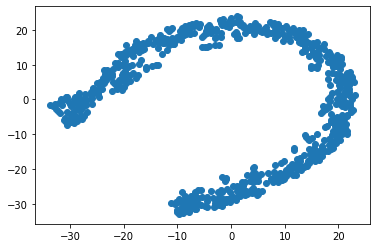

In [45]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

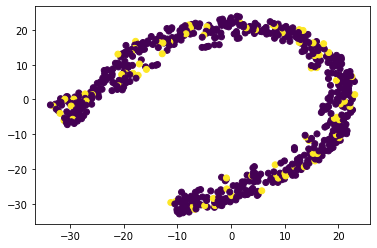

In [46]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

Cluster Analysis with K-means

In [47]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,9511.838317
1,2,8246.936744
2,3,7414.590019
3,4,7064.831883
4,5,6754.123079


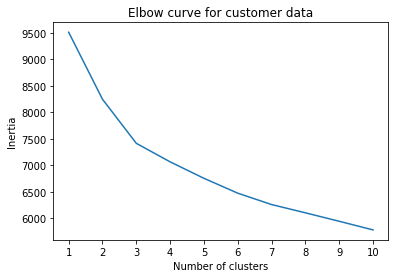

In [48]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [49]:
def get_clusters(k, df_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_pca)

    # Predict clusters
    predictions = model.predict(df_pca)

    # Create return DataFrame with predicted clusters
    df_pca["class"] = model.labels_

    return df_pca

In [50]:
clusters = get_clusters(3, df_pca)

In [51]:
clusters

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,class
0,0.408499,1.191465,-0.246194,-1.038392,1.574974,-3.107343,-1.225087,1.315711,-2.842333,1.347579,0.827039,1.182845,2
1,-1.255955,-1.759295,0.089352,-1.736459,0.864528,0.309315,0.271741,-1.138678,-0.359133,1.292298,0.655064,-0.230062,0
2,-0.835538,-0.545967,-1.183861,1.475540,1.405637,0.083998,0.560589,-0.676384,-0.533608,0.592163,-0.052580,0.909940,2
3,0.248691,1.376902,-1.102852,-1.637322,1.786885,-0.490410,-1.533904,0.719286,-2.116014,0.270067,-0.600760,0.213377,2
4,-0.663497,-3.404216,0.595747,0.245819,0.862921,0.357488,0.974725,0.930010,-1.459994,-0.074953,1.066740,0.053505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.440896,0.725646,2.872148,0.223140,-1.776830,0.683581,1.217903,-0.423467,0.381116,-1.032803,-0.767416,-0.808529,2
614,-0.968145,-1.348097,0.030099,-1.099736,-1.136257,-0.803599,0.139418,0.187906,1.887378,0.978566,-0.058810,0.173183,0
615,-1.104954,-2.427510,0.508401,0.055248,-1.608186,0.465660,-0.654549,1.199820,1.497846,0.348439,1.082140,-1.266818,0
616,-1.018682,1.016908,-0.471448,0.696391,-0.760403,-1.180770,0.276718,0.261569,0.425581,0.329355,-2.285482,-0.045510,2


In [52]:
def show_clusters(df_pca):
    plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'], c=df_pca['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Myopia Clusters')
    plt.show()

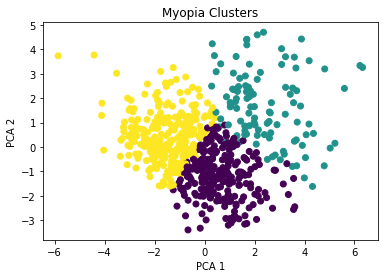

In [53]:
show_clusters(clusters)